<a href="https://colab.research.google.com/github/manuelncsu/Bacterial-WGS-bioinformatics-workshop/blob/main/Day_3/Bioinformatics_course_Day_3_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

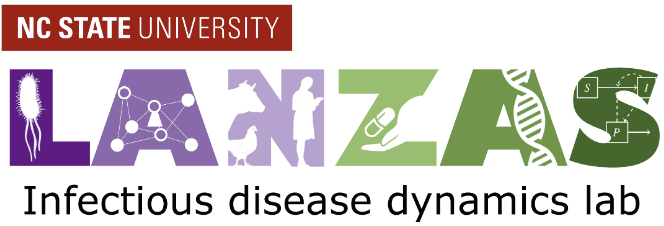

# **Bacterial WGS bioinformatics workshop**
## **Day 3 - Part 3.** Pangenome visualization

##**Step 1:** Mounting your google drive into google colab

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/gdrive/', force_remount=True)

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/gdrive/


##Lets check if it works!

In [ ]:
ls

gdrive/  sample_data/


##Lets go to the workshop main folder

In [ ]:
cd /content/gdrive/Shareddrives/Bacterial_bioinformatics_workshop/Day_3/Part_3/Pangenome_visualization

/content/gdrive/Shareddrives/Bacterial_bioinformatics_workshop/Day_3/Part_3/Pangenome_visualization


##Install Conda

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


##Verify Conda installation

In [ ]:
!conda --version

conda 23.3.1


##Lets install some necessary packages in your Conda environment

In [ ]:
!conda install pandas numpy matplotlib

##**Step 2:** Lets move the gene presence/absence matrix previously generated to our current directory

In [ ]:
import shutil
import os

# Source and destination folders
source_folder = "/content/gdrive/Shareddrives/Bacterial_bioinformatics_workshop/Day_3/Part_2/pangenome"
destination_folder = "/content/gdrive/Shareddrives/Bacterial_bioinformatics_workshop/Day_3/Part_3/Pangenome_visualization"

# File to copy
file_to_copy = "gene_presence_absence_roary.csv"

# Construct source and destination paths
source_path = os.path.join(source_folder, file_to_copy)
destination_path = os.path.join(destination_folder, file_to_copy)

# Check if the file exists in the source folder before copying
if os.path.exists(source_path):
    # Copy the file
    shutil.copy(source_path, destination_path)
    print(f"Copied {file_to_copy} to {destination_folder}")
else:
    print(f"{file_to_copy} not found in {source_folder}")

Copied gene_presence_absence_roary.csv to /content/gdrive/Shareddrives/Workshop Manuel & Alba/Day_3/Part_3/Pangenome_visualization


##**Step 2:** Install the necessary R packages to produce the pangenome visualization using Pagoo

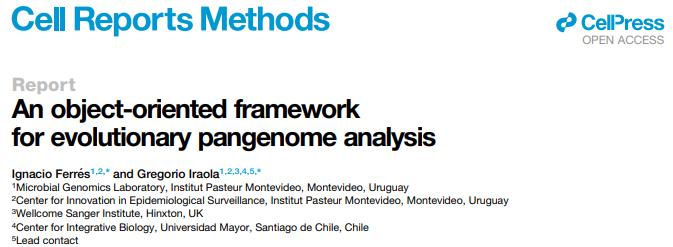

## Link to the article: https://www.cell.com/cell-reports-methods/pdf/S2667-2375(21)00140-5.pdf

In [ ]:
%reload_ext rpy2.ipython

In [ ]:
%%R

# Paste the modified R code here
# Install required R packages, if the box appears, click 1 and press enter
if (!requireNamespace("devtools", quietly = TRUE)) install.packages("devtools")
devtools::install_github('iferres/pagoo')
install.packages("ggplot2")
install.packages('htmltools')
install.packages('htmlwidgets')

# Load libraries
library(htmltools)
library(htmlwidgets)
library(pagoo)
library(ggplot2)
library(patchwork)

## Checking that all the required packages have been installed

In [ ]:
%%R

# Check if required R packages are installed
packages <- c("devtools", "pagoo", "ggplot2", "htmltools", "htmlwidgets")

# Check if each package is installed
for (pkg in packages) {
  if (!requireNamespace(pkg, quietly = TRUE)) {
    cat(paste("Package", pkg, "is not installed.\n"))
  } else {
    cat(paste("Package", pkg, "is installed.\n"))
  }
}


Package devtools is installed.
Package pagoo is installed.
Package ggplot2 is installed.
Package htmltools is installed.
Package htmlwidgets is installed.


In [ ]:
ls

condacolab_install.log  gene_presence_absence_roary.csv  rarefaction_curves.png


## Lets visualize our pangenome results

R[write to console]: Reading csv file (roary).

R[write to console]: Processing csv file.

R[write to console]: Loading PgR6M class object.

R[write to console]: Checking class.

R[write to console]: Checking dimnames.

R[write to console]: Creating gid (gene ids).

R[write to console]: Checking provided cluster metadata.

R[write to console]: Creating panmatrix.

R[write to console]: Populating class.

R[write to console]: Done.



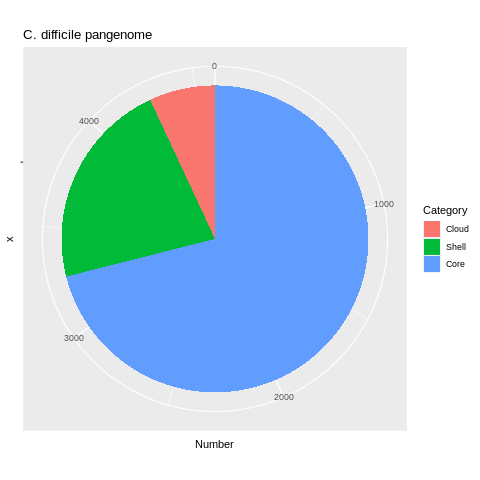

In [ ]:
%%R

# If everything looks fine, create the pagoo object
p <- roary_2_pagoo("/content/gdrive/Shareddrives/Bacterial_bioinformatics_workshop/Day_3/Part_3/Pangenome_visualization/gene_presence_absence_roary.csv")

# Basic
pie1 <- p$gg_pie() + ggtitle("C. difficile pangenome")

# Arrange (patchwork) and plot
pie1

## Gene frequency barplot

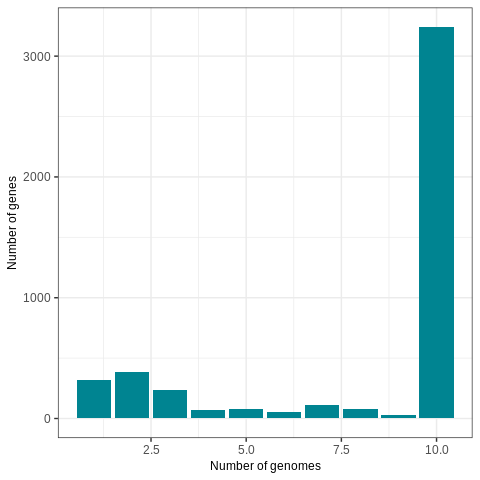

In [ ]:
%%R

# Install necessary packages
if (!requireNamespace("ggplot2", quietly = TRUE)) install.packages("ggplot2")

# Load libraries
library(ggplot2)

# Assuming p$gg_barplot() is your original bar plot
# Create a modified bar plot with custom fill color
custom_barplot <- p$gg_barplot() +
  geom_bar(stat = 'identity', fill = '#008491') +  # Change to your desired color
  theme_bw(base_size = 15) +
  theme(
    axis.title = element_text(size = 12),
    axis.text = element_text(size = 12)
  )

# Display the modified bar plot
print(custom_barplot)

## Pangenome binmap plot

In [ ]:
%%R
# Assuming p$gg_binmap() is your original binmap plot
# Create a modified binmap with custom fill color and adjusted width
pangenome_binmap <- p$gg_binmap() +
  scale_fill_manual(values = c('#008491', 'white')) +  # Change to your desired color
  theme_bw(base_size = 10) +  # Adjust the base font size
  theme(
    axis.title = element_text(size = 8),  # Adjust the axis title font size
    axis.text = element_text(size = 6)    # Adjust the axis text font size
  )

# Set the width and height of the plot
options(repr.plot.width = 17)  # Adjust the width
options(repr.plot.height = 8)  # Adjust the height

# Save the modified binmap with adjusted width and height
ggsave(
  filename = "/content/gdrive/Shareddrives/Bacterial_bioinformatics_workshop/Day_3/Part_3/Pangenome_visualization/pangenome_binmap.png",
  plot = pangenome_binmap,
  width = 17,  # Adjust the width
  height = 8,  # Adjust the height
  units = "cm"
)


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


# To display the pangenome binmap figure

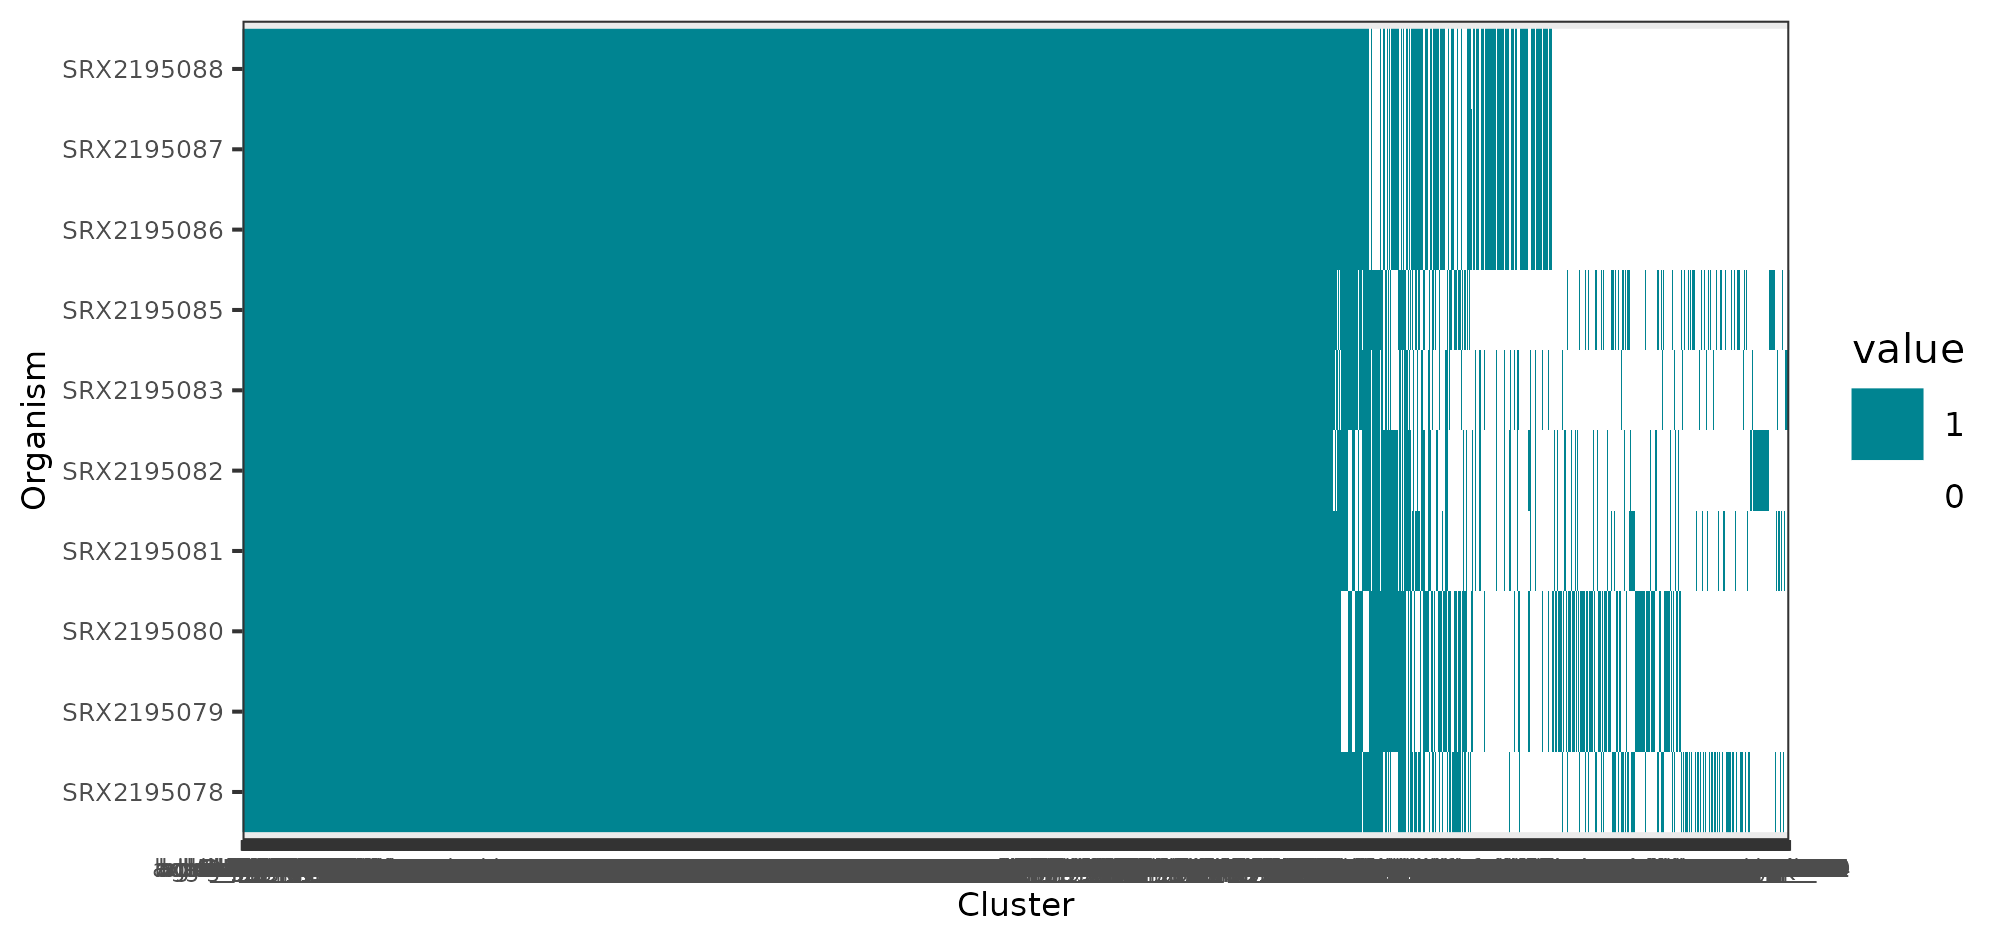

In [ ]:
from IPython.display import Image

# Set the path to the image
img_path = "/content/gdrive/Shareddrives/Bacterial_bioinformatics_workshop/Day_3/Part_3/Pangenome_visualization/pangenome_binmap.png"

# Display the image
Image(filename=img_path, width=1000)

## Pangenome curves plot

In [ ]:
%%R

# Save the plot with adjusted width and height
ggsave(
  filename = "/content/gdrive/Shareddrives/Bacterial_bioinformatics_workshop/Day_3/Part_3/Pangenome_visualization/rarefaction_curves.png",
  plot = p$gg_curves() +
    theme_minimal() +
    labs(title = 'Pangenome and Coregenome curves') +
    geom_point() +
    facet_wrap(~Category, scales = 'free_y') +
    theme_bw(base_size = 15) +
    scale_color_brewer(palette = "Accent") +
    theme(legend.position="bottom"),  # Add this line to keep the legend
  width = 20,  # Adjust the width
  height = 8,  # Adjust the height
  units = "cm"
)


# To display the pangenome curves figure

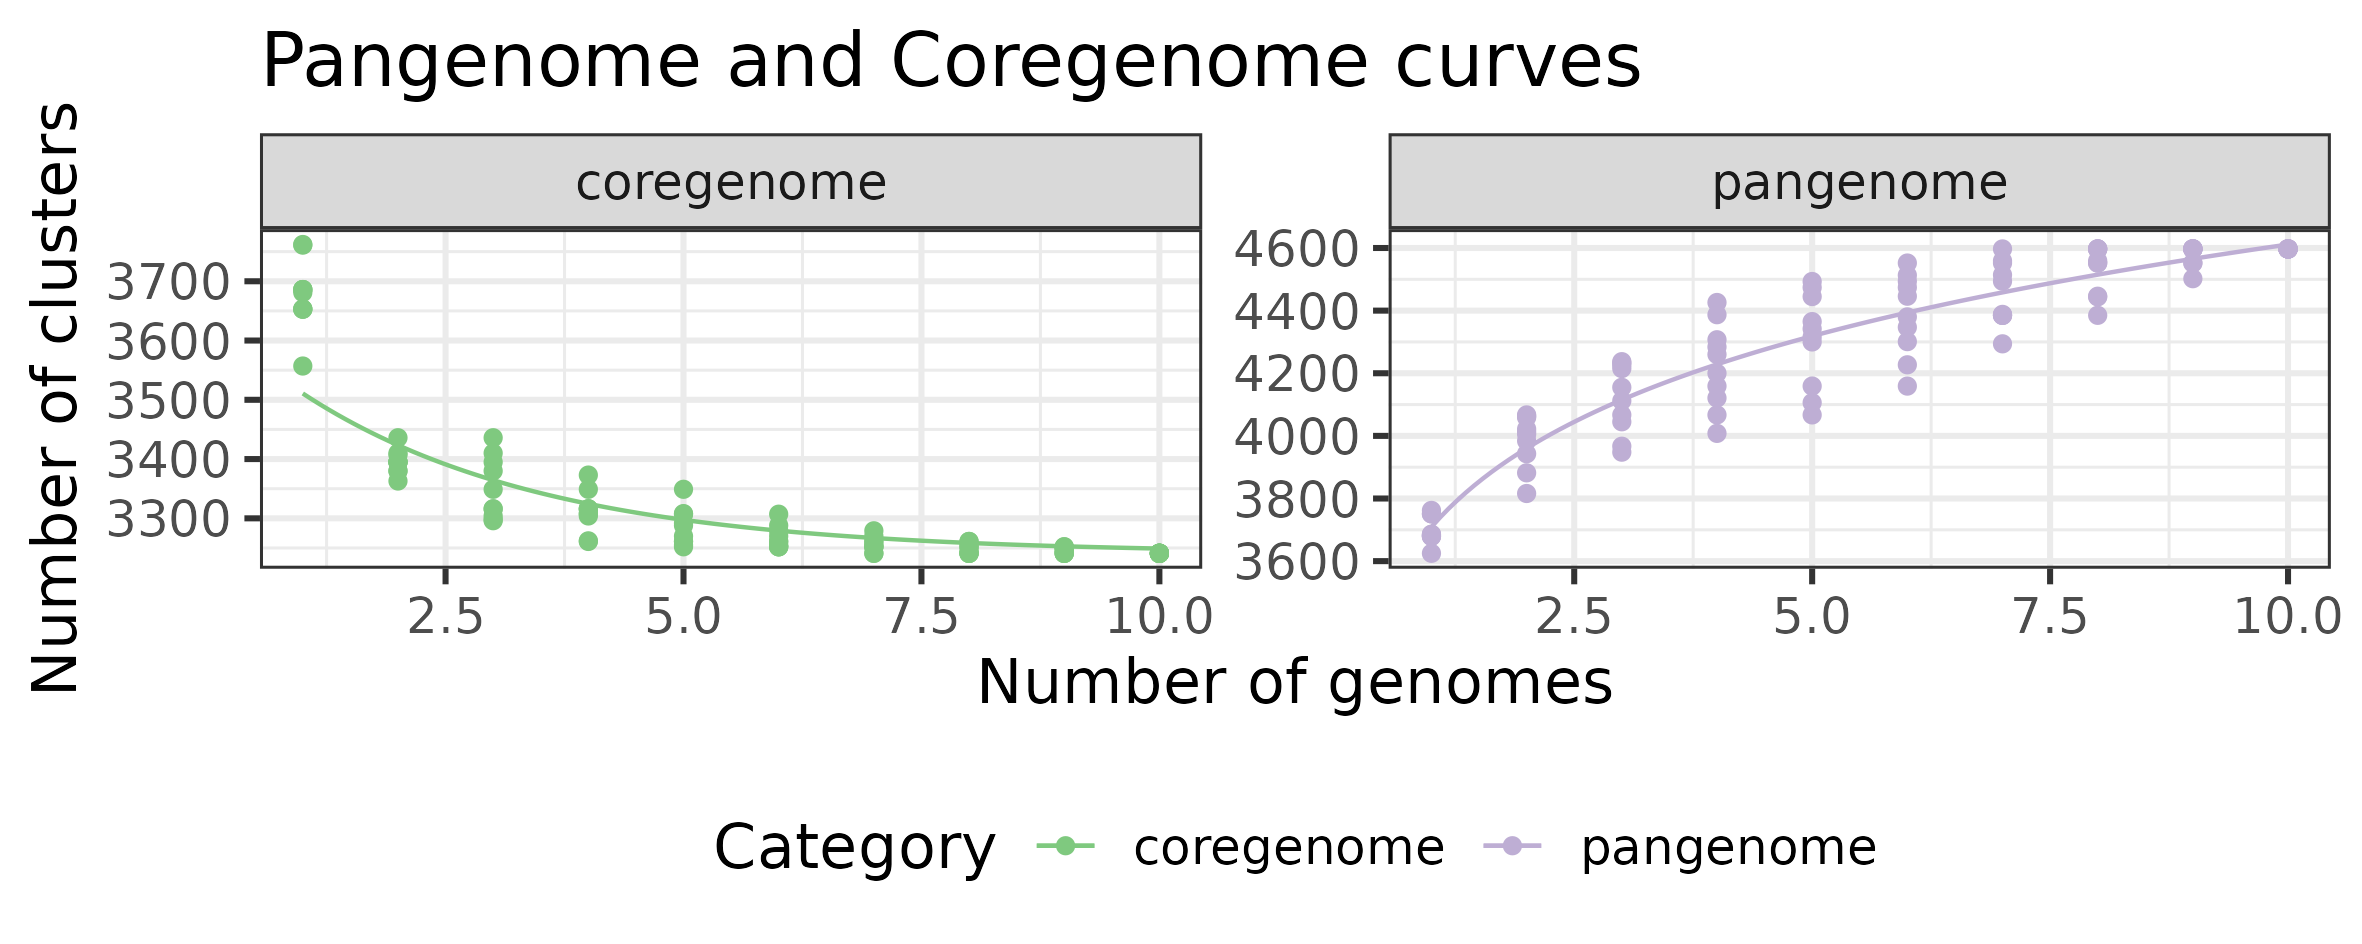

In [ ]:
from IPython.display import Image

# Set the path to the image
img_path = "/content/gdrive/Shareddrives/Bacterial_bioinformatics_workshop/Day_3/Part_3/Pangenome_visualization/rarefaction_curves.png"

# Display the image
Image(filename=img_path, width=1000)

## Combined pangenome curves plot

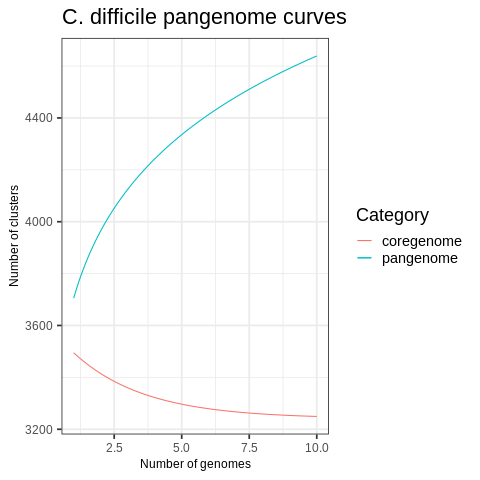

In [ ]:
%%R

# Combined plot
curves <- p$gg_curves() + ggtitle("C. difficile pangenome curves")  +
  theme_bw(base_size = 18) +
  theme(
    axis.title = element_text(size = 12),
    axis.text = element_text(size = 12)
  )

# Arrange (patchwork) and plot
curves

## Finaly, lets check the R shiny file